In [243]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR,SVC
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier,ExtraTreeRegressor,ExtraTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier,GradientBoostingRegressor,GradientBoostingClassifier
from xgboost import XGBRegressor,XGBClassifier
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_classif
import warnings
from scipy.stats import zscore
warnings.filterwarnings('ignore')

In [244]:
#loading  restaurant data
df1=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv',encoding='ISO-8859-1')
df1.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [245]:
#loading restaurant country name
df2=pd.read_excel('/content/Country-Code (2).xlsx')
df2.head(5)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [246]:
#joining dataframes based on country code
df=pd.merge(left=df1,right=df2,on='Country Code')

In [247]:
#droping unwanted features
df.drop(columns=['Rating text','Restaurant ID','Country Code','Address','Locality','Locality Verbose','Longitude','Latitude','Switch to order menu'],axis=1,inplace=True)

In [248]:
#check metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   City                  9551 non-null   object 
 2   Cuisines              9542 non-null   object 
 3   Average Cost for two  9551 non-null   int64  
 4   Currency              9551 non-null   object 
 5   Has Table booking     9551 non-null   object 
 6   Has Online delivery   9551 non-null   object 
 7   Is delivering now     9551 non-null   object 
 8   Price range           9551 non-null   int64  
 9   Aggregate rating      9551 non-null   float64
 10  Rating color          9551 non-null   object 
 11  Votes                 9551 non-null   int64  
 12  Country               9551 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 1.0+ MB


In [249]:
#check null values
df.isna().sum()

Restaurant Name         0
City                    0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Votes                   0
Country                 0
dtype: int64

In [250]:
# #check realation of features with label
# plt.figure(figsize=(20,10))
# plotno=1
# for i in df.columns:
#     if i == 'Average Cost for two':
#         continue

#     plt.subplot(4, 3, plotno)
#     sns.scatterplot(data=df, x=df[i], y=df['Average Cost for two'])
#     plt.xlabel(i)
#     plt.ylabel('Average Cost for two')
#     plt.title("Feature Relation with Label: " + i)
#     plotno += 1

# plt.tight_layout()
# plt.show()

In [251]:
#ordinal encoding
data_reshaped = pd.DataFrame(df, columns=['Rating color'])
categories_order = [['White', 'Red', 'Orange', 'Yellow', 'Green', 'Dark Green']]
encoder = OrdinalEncoder(categories=categories_order)
df['Rating color'] = encoder.fit_transform(data_reshaped)


In [252]:
#feature encoding
encode_f=['Currency','Has Table booking','Has Online delivery','Is delivering now']
encoder=LabelEncoder()
for i in encode_f:
  df[i]=encoder.fit_transform(df[i])
  # mapping=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
  # print('-'* 15,i,'-'*15)
  # print(mapping)

In [253]:
#Frequency Encoding
freq_f=['Restaurant Name','City','Cuisines','Country']
for i in freq_f:
  frequency_encoding = df[i].value_counts(normalize=True).to_dict()
  df[i] = df[i].map(frequency_encoding)

In [254]:
def inToRupees():
  for i in range (df.shape[0]):
    if df.iloc[i,4]==0:
      df.iloc[i,3]=df.iloc[i,3] * 6.18

    elif df.iloc[i,4]==1:
      df.iloc[i,3]=df.iloc[i,3] * 17.08

    elif df.iloc[i,4]==2:
      df.iloc[i,3]=df.iloc[i,3] * 83.17

    elif df.iloc[i,4]==3:
      df.iloc[i,3]=df.iloc[i,3] * 22.66

    elif df.iloc[i,4]==4:
      df.iloc[i,3]=df.iloc[i,3] * 1

    elif df.iloc[i,4]==5:
      df.iloc[i,3]=df.iloc[i,3] * 0.0054

    elif df.iloc[i,4]==6:
      df.iloc[i,3]=df.iloc[i,3] * 52.78

    elif df.iloc[i,4]==7:
      df.iloc[i,3]=df.iloc[i,3] * 105.93

    elif df.iloc[i,4]==8:
      df.iloc[i,3]=df.iloc[i,3] * 22.85

    elif df.iloc[i,4]==9:
      df.iloc[i,3]=df.iloc[i,3] * 4.49

    elif df.iloc[i,4]==10:
      df.iloc[i,3]=df.iloc[i,3] * 0.26

    elif df.iloc[i,4]==11:
      df.iloc[i,3]=df.iloc[i,3] * 2.82

    else:
      df.iloc[i,3]= np.nan

In [255]:
#converting average cost of two person into indian rupees
inToRupees()

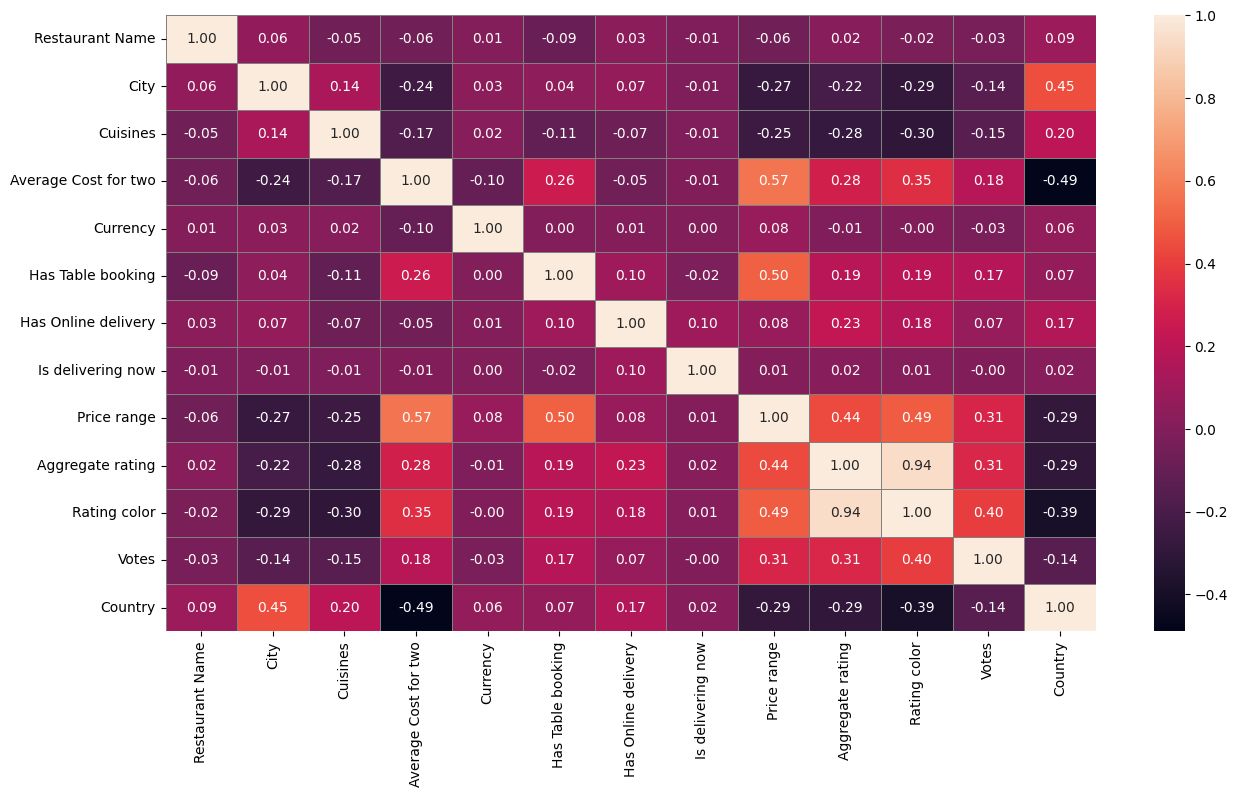

In [256]:
#check correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor='gray', fmt=".2f")
plt.show()

In [257]:
#drop nan values
df.dropna(inplace=True)

In [258]:
#spliting labels and features
X=df.drop(columns='Average Cost for two',axis=1)
y=df['Average Cost for two']



In [ ]:
#checking muliticolliniearity
vif=pd.DataFrame()
vif['features']=X.columns
vif['score']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

,features,score
0,Restaurant Name,1.190102
1,City,3.891310
2,Cuisines,1.689908
3,Currency,13.925431
4,Has Table booking,1.589037
5,Has Online delivery,1.514688
6,Is delivering now,1.016056
7,Price range,8.303805
8,Aggregate rating,44.375461
9,Rating color,41.186666


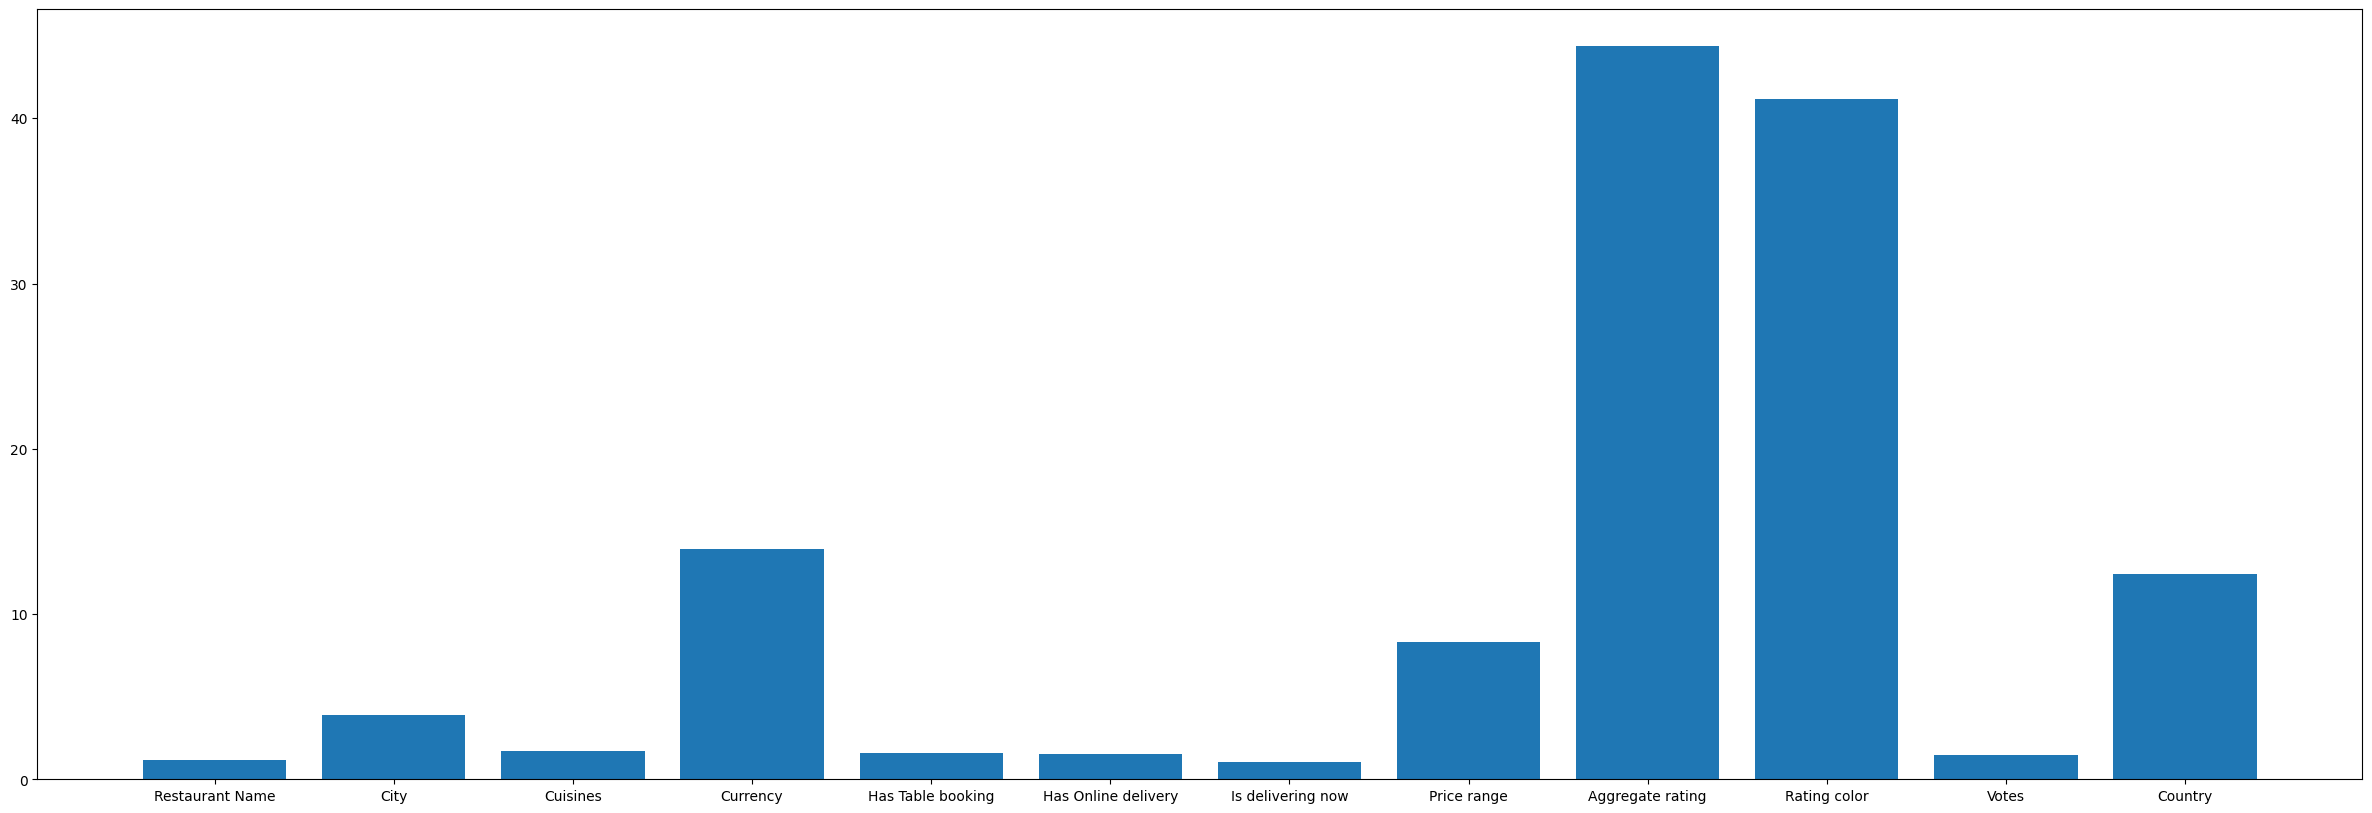

In [ ]:
#ploting vif score to visualizing easily  which features has high score
plt.figure(figsize=(30,10))
plt.bar(vif['features'],vif['score'])
plt.show()

In [ ]:
X.drop(columns='Aggregate rating',axis=1,inplace=True)

In [ ]:
#selecting best 18 features
select=SelectKBest(score_func=f_regression,k=10)
x_best=select.fit_transform(X,y)

In [ ]:
#normaliazing scale
scal=StandardScaler()
x_scal=scal.fit_transform(x_best)

In [ ]:
#finding best random state
def random_state(f, l):
    maxscr = 0
    ind = 0
    for i in range(100):
        x_train, x_test, y_train, y_test = train_test_split(f, l, test_size=0.25, random_state=i)
        lr = LinearRegression()
        lr.fit(x_train, y_train)
        scr = r2_score(y_test, lr.predict(x_test))
        if maxscr < scr:
            maxscr = scr
            ind = i
    print(f'maxscore {maxscr} at random state {ind}')
    return ind

In [ ]:
ind=random_state(x_scal,y)

maxscore 0.6390106428426865 at random state 41


In [ ]:
#separating training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_scal, y, test_size=0.25, random_state=ind)

In [ ]:
#define function to build model
def train_model(alg,x_train,x_test,y_train,y_test):
  alg.fit(x_train,y_train)
  print('-'*15,'Training Score','-'*15)
  ytr_pred=alg.predict(x_train)
  training_score=r2_score(y_train,ytr_pred)
  print(training_score)
  print('-'*15,'Testing Score','-'*15)
  ytest_pred=alg.predict(x_test)
  testing_score=r2_score(y_train,ytr_pred)
  print(testing_score)
  return testing_score

In [ ]:
#building linearregression
lr_testing_score=train_model(LinearRegression(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.4234876674547713
--------------- Testing Score ---------------
0.4234876674547713


In [ ]:
#building svr
svr_testing_score=train_model(SVR(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.09339434107881917
--------------- Testing Score ---------------
0.09339434107881917


In [ ]:
#building Decisiontreeregressor
dtr_testing_score=train_model(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.9993861317391398
--------------- Testing Score ---------------
0.9993861317391398


In [ ]:
#building ExtraTreeRegressor
etr_testing_score=train_model(ExtraTreeRegressor(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.9993650287492237
--------------- Testing Score ---------------
0.9993650287492237


In [ ]:
#building Randomforestregressor
rfr_testing_score=train_model(RandomForestRegressor(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.9582644387627877
--------------- Testing Score ---------------
0.9582644387627877


In [ ]:
#building AdaBoostRegressor
adr_testing_score=train_model(AdaBoostRegressor(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.715739333032509
--------------- Testing Score ---------------
0.715739333032509


In [ ]:
#building GradientBoostingRegressor
gbr_testing_score=train_model(GradientBoostingRegressor(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.8622608802445733
--------------- Testing Score ---------------
0.8622608802445733


In [ ]:
#building XGBRegressor
xgbr_testing_score=train_model(XGBRegressor(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.9932189940906908
--------------- Testing Score ---------------
0.9932189940906908


**Cross validation**

In [ ]:
def cross_check(alg,x,y,testing_score):
  cv=cross_val_score(alg,x,y,cv=10)
  print('CV Mean                    testing score                         difference')
  print(f'{round(cv.mean(),2)*100}                            {round(testing_score,2)*100}                                {round(((cv.mean()*100)-(testing_score*100)),2)}')

In [ ]:
#cross validation of LinearRegression
cross_check(LinearRegression(),x_train,y_train,lr_testing_score)

CV Mean                    testing score                         difference
46.0                            42.0                                4.08


In [ ]:
#cross validation of SVR
cross_check(SVR(),x_train,y_train,svr_testing_score)

CV Mean                    testing score                         difference
11.0                            9.0                                1.66


In [ ]:
#cross validaiton of DecisionTreeRegressor
cross_check(DecisionTreeRegressor(),x_train,y_train,dtr_testing_score)

CV Mean                    testing score                         difference
69.0                            100.0                                -31.4


In [ ]:
#cross validation of ExtraaTreeRegressor
cross_check(ExtraTreeRegressor(),x_train,y_train,etr_testing_score)

CV Mean                    testing score                         difference
51.0                            100.0                                -49.28


In [ ]:
#cross validation randomforestregressor
cross_check(RandomForestRegressor(),x_train,y_train,rfr_testing_score)

CV Mean                    testing score                         difference
71.0                            96.0                                -24.67


In [ ]:
#cross validation AdaBoostRegressor
cross_check(AdaBoostRegressor(),x_train,y_train,adr_testing_score)

CV Mean                    testing score                         difference
38.0                            72.0                                -33.9


In [ ]:
#cross validation of GradienBoostingRegressor
cross_check(GradientBoostingRegressor(),x_train,y_train,gbr_testing_score)

CV Mean                    testing score                         difference
71.0                            86.0                                -15.15


In [ ]:
#XGBRegressor
cross_check(XGBRegressor(),x_train,y_train,xgbr_testing_score)

CV Mean                    testing score                         difference
66.0                            99.0                                -33.14


**parameter tunning**

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split':[2,4],
    'min_samples_leaf':[1,2]
    }

gb_regressor = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'learning_rate': 0.1,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
#building tunned model
tunned_gbc=GradientBoostingRegressor(learning_rate=0.1,min_samples_leaf=2,min_samples_split=2,n_estimators=100)
tunned_gbc.fit(x_train,y_train)
pred=tunned_gbc.predict(x_test)
tune_score=r2_score(y_test,pred)
print('score: ',tune_score)

score:  0.8051806594658717


In [ ]:
#cross validation of GradienBoostingRegressor
cross_check(GradientBoostingRegressor(learning_rate=0.1,min_samples_leaf=2,min_samples_split=2,n_estimators=100),x_train,y_train,tune_score)

CV Mean                    testing score                         difference
71.0                            81.0                                -9.74


In [ ]:
#model saving
import pickle as pkl
pkl.dump(tunned_gbc,open('zomztoCostPred_gbc.sav','wb'))

In [ ]:
#loading model
Tmin_model=pkl.load(open('zomztoCostPred_gbc.sav','rb'))

In [ ]:
#comparing original and predicted label
cmp_df=pd.DataFrame()
cmp_df['Org_cost']=y_test
cmp_df['pred_cost']=Tmin_model.predict(x_test)
cmp_df

,Org_cost,pred_cost
8811,150.0,272.655879
7806,200.0,269.528081
8957,400.0,272.655879
7367,500.0,589.026502
3060,2400.0,2654.917339
...,...,...
8356,500.0,607.252632
2946,600.0,623.675051
5306,100.0,269.528081
8219,500.0,632.009025


# Price Range Prediction

In [259]:
X=df.drop(columns='Price range',axis=1)
y=df['Price range']

In [260]:
#selecting best 18 features
select=SelectKBest(score_func=mutual_info_classif,k=10)
x_best=select.fit_transform(X,y)

In [261]:
#normaliazing scale
scal=StandardScaler()
x_scal=scal.fit_transform(x_best)

In [262]:
#find random state that split data well
def random_state(alg,x,y):
  maxscore,ind=0,0
  for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    alg.fit(x_train,y_train)
    randompred=alg.predict(x_test)
    score=accuracy_score(y_test,randompred)
    if score > maxscore:
      maxscore=score
      ind=i
  return maxscore,ind

In [263]:
maxscore,random_state=random_state(LogisticRegression(),x_scal,y)
print(f'maxscore {maxscore} at random state {random_state}')

maxscore 0.9170159262363788 at random state 33


In [264]:
#spliting training and testing data
x_train,x_test,y_train,y_test=train_test_split(x_scal,y,test_size=0.25,random_state=random_state)

In [265]:
#deining method for training/building model
def build_model(alg,x_train,x_test,y_train,y_test):
  alg.fit(x_train,y_train)
  print('-'*10,'Training Score','-'*10)
  train_score,test_score=None,None
  train_pred=alg.predict(x_train)
  train_score=accuracy_score(y_train,train_pred)
  print(train_score)
  print('\n','-'*10,'Testing Score','-'*10)
  test_pred,test_score=None,None
  test_pred=alg.predict(x_test)
  test_score=accuracy_score(y_test,test_pred)
  print(test_score)
  print('-'*10,'Confusion Matrix','-'*10)
  print(confusion_matrix(y_test,test_pred))
  return alg,test_score


In [266]:
#building logisticregression
lc,lcTestScore=build_model(LogisticRegression(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.905673560648407

 ---------- Testing Score ----------
0.9170159262363788
---------- Confusion Matrix ----------
[[1113   11    0    0]
 [  19  745   26    3]
 [   3   74  247    8]
 [   0    5   49   83]]


In [267]:
#building svc
svc,svcTestScore=build_model(SVC(probability=True),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.9245388485187256

 ---------- Testing Score ----------
0.9107292539815591
---------- Confusion Matrix ----------
[[1107   15    2    0]
 [  61  694   37    1]
 [   1   51  273    7]
 [   0    2   36   99]]


In [268]:
#building kneighbors
knc,kncTestScore=build_model(KNeighborsClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.9204863051984349

 ---------- Testing Score ----------
0.8709136630343671
---------- Confusion Matrix ----------
[[1043   79    2    0]
 [  58  686   48    1]
 [   3   59  256   14]
 [   0    3   41   93]]


In [269]:
#building decisiontreeclassifier
dtc,dtcTestScore=build_model(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
1.0

 ---------- Testing Score ----------
0.9660519698239731
---------- Confusion Matrix ----------
[[1117    7    0    0]
 [  12  762   19    0]
 [   0   13  300   19]
 [   0    0   11  126]]


In [270]:
#building ExtraTreeClassifier
etc,etcTestScore=build_model(ExtraTreeClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
1.0

 ---------- Testing Score ----------
0.8851634534786254
---------- Confusion Matrix ----------
[[1058   65    1    0]
 [  52  691   47    3]
 [   2   47  257   26]
 [   0    3   28  106]]


In [271]:
#building RandomForestClassifier
rfc,rfcTestScore=build_model(RandomForestClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
1.0

 ---------- Testing Score ----------
0.9681475272422464
---------- Confusion Matrix ----------
[[1120    4    0    0]
 [  11  768   13    1]
 [   0   18  304   10]
 [   0    0   19  118]]


In [272]:
#building AdaBoostClassifier
abc,abcTestScore=build_model(AdaBoostClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.7688652878703186

 ---------- Testing Score ----------
0.7678122380553227
---------- Confusion Matrix ----------
[[838 286   0   0]
 [  4 783   6   0]
 [  0 119 211   2]
 [  0 117  20   0]]


In [273]:
#building GradientBoostingClassifier
gbc,gbTestScore=build_model(GradientBoostingClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.9864449413079933

 ---------- Testing Score ----------
0.9756915339480302
---------- Confusion Matrix ----------
[[1120    4    0    0]
 [   2  779   12    0]
 [   0   20  305    7]
 [   0    0   13  124]]


In [275]:
#cross validation
def crosscheck(alg,test_score=None):
  cv=cross_val_score(alg,x_train,y_train)
  cvmean=round(((cv.mean())*100),2)
  testing_score=round(test_score*100,2)
  print('-'*63)
  print('|  ',cv,' |')
  print('-'*63)
  print('|  cv.mean    |    testing score    |         difference      |')
  print('-'*63)
  print(f'|  {cvmean}      |          {testing_score}      |           {round(cvmean-testing_score,2)}         |')
  print('-'*63)

In [276]:
#Cross validation of logisticregression
crosscheck(LogisticRegression(),lcTestScore)

---------------------------------------------------------------
|   [0.89944134 0.90006988 0.90426275 0.90006988 0.907058  ]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  90.22      |          91.7      |           -1.48         |
---------------------------------------------------------------


In [277]:
#Cross validation of SVC
crosscheck(SVC(),svcTestScore)

---------------------------------------------------------------
|   [0.90293296 0.90566038 0.90286513 0.90426275 0.89797345]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  90.27      |          91.07      |           -0.8         |
---------------------------------------------------------------


In [278]:
#Cross validation of KneighborsClassifier
crosscheck(KNeighborsClassifier(),kncTestScore)

---------------------------------------------------------------
|   [0.86312849 0.86512928 0.86512928 0.8427673  0.86373166]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  86.0      |          87.09      |           -1.09         |
---------------------------------------------------------------


In [279]:
#Cross validation of DecisionTreeClassifier
crosscheck(DecisionTreeClassifier(),dtcTestScore)

---------------------------------------------------------------
|   [0.96857542 0.96715584 0.96645702 0.96785465 0.96366177]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  96.67      |          96.61      |           0.06         |
---------------------------------------------------------------


In [280]:
#Cross validation of ExtraTreeCLassifier
crosscheck(ExtraTreeClassifier(),etcTestScore)

---------------------------------------------------------------
|   [0.83449721 0.85115304 0.81062194 0.85674354 0.88120196]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  84.68      |          88.52      |           -3.84         |
---------------------------------------------------------------


In [281]:
#Cross validation of RandomForestClassifier
crosscheck(RandomForestClassifier(),rfcTestScore)

---------------------------------------------------------------
|   [0.96927374 0.97903564 0.9706499  0.96995108 0.96855346]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  97.15      |          96.81      |           0.34         |
---------------------------------------------------------------


In [282]:
#Cross validation of AdaBoostClassifier
crosscheck(AdaBoostClassifier(),abcTestScore)

---------------------------------------------------------------
|   [0.82472067 0.4884696  0.41090147 0.83438155 0.75122292]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  66.19      |          76.78      |           -10.59         |
---------------------------------------------------------------


In [283]:
#Cross validation of GradientBoostingClassifier
crosscheck(GradientBoostingClassifier(),gbTestScore)

---------------------------------------------------------------
|   [0.97695531 0.97833683 0.97833683 0.9706499  0.97484277]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  97.58      |          97.57      |           0.01         |
---------------------------------------------------------------


In [285]:
#model saving
import pickle as pkl
pkl.dump(gbc,open('zomatoPriceRange_gbc.sav.sav','wb'))

In [286]:
#model saving
model=pkl.load(open('zomatoPriceRange_gbc.sav.sav','rb'))

In [287]:
compdf=pd.DataFrame()
compdf['org_label']=y_test
compdf['pred_label']=model.predict(x_test)
compdf

,org_label,pred_label
5913,1,1
2123,2,2
5490,1,1
1723,2,2
7666,1,1
...,...,...
5142,1,1
3335,1,1
4034,1,1
5073,1,1
